<a href="https://colab.research.google.com/github/aderdouri/ActuarialThesis/blob/master/Notebooks/Comparaison/myFrenchMotorThirdPartyLiabilityClaimsDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from copy import deepcopy
import time

%matplotlib inline

In [2]:
sns.set_theme()

In [3]:
!rm -rf ActuarialThesis
!git clone https://github.com/aderdouri/ActuarialThesis.git

Cloning into 'ActuarialThesis'...
remote: Enumerating objects: 1014, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 1014 (delta 151), reused 222 (delta 107), pack-reused 717
Receiving objects: 100% (1014/1014), 129.94 MiB | 22.53 MiB/s, done.
Resolving deltas: 100% (441/441), done.


In [4]:
!ls -ltr ActuarialThesis/Data

total 44752
-rw-r--r-- 1 root root   562212 Oct 31 06:54 BASEAUTO.csv
-rw-r--r-- 1 root root   201188 Oct 31 06:54 df_models.csv
-rw-r--r-- 1 root root  3263186 Oct 31 06:54 encodedBASEAUTO.csv
-rw-r--r-- 1 root root  3273326 Oct 31 06:54 encodedCategoricalBASEAUTO.csv
-rw-r--r-- 1 root root  2236112 Oct 31 06:54 encodedTDboostEMTDboost.csv
-rw-r--r-- 1 root root   698687 Oct 31 06:54 encodedTestBASEAUTO.csv
-rw-r--r-- 1 root root  2792067 Oct 31 06:54 encodedTrainBASEAUTO.csv
-rw-r--r-- 1 root root 31528920 Oct 31 06:54 freMTPL2freq.csv
-rw-r--r-- 1 root root   403127 Oct 31 06:54 freMTPL2sev.csv
-rw-r--r-- 1 root root   846739 Oct 31 06:54 transformedBASEAUTO.csv


In [6]:
freMTPL2freq = pd.read_csv('ActuarialThesis/Data/freMTPL2freq.csv')
print('dataset size: {}'.format(len(freMTPL2freq)))
freMTPL2freq.head()

dataset size: 678013


,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [ ]:
len(freMTPL2freq.columns)

12

In [7]:
freMTPL2sev = pd.read_csv('ActuarialThesis/Data/freMTPL2sev.csv')
print('dataset size: {}'.format(len(freMTPL2sev)))
freMTPL2sev.head()

dataset size: 26639


,IDpol,ClaimAmount
0,1552,995.20
1,1010996,1128.12
2,4024277,1851.11
3,4007252,1204.00
4,4046424,1204.00


In [8]:
freMTPL2freq[freMTPL2freq['IDpol']==24952]

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
9387,24952.0,0,0.005464,A,6,15,50,50,B2,Diesel,29,R24


In [9]:
freMTPL2freq[freMTPL2freq['IDpol']==2]

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region


In [10]:
set_freq = set(freMTPL2freq[freMTPL2freq['ClaimNb']>=1]['IDpol'])
len(set_freq.difference(freMTPL2sev['IDpol']))

9116

In [11]:
freMTPL2sev[freMTPL2sev['IDpol']==24952.0]

,IDpol,ClaimAmount


In [12]:
freMTPL2freq[freMTPL2freq['IDpol']==4046424]

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
508571,4046424.0,1,0.86,F,12,0,37,50,B12,Diesel,27000,R11


On merge sur `IDpol` pour avoir un seul dataset qui contient les deux variables réponses `ClaimNb` et `ClaimAmount`.

In [13]:
freMTPL2freqsev = pd.merge(freMTPL2freq, freMTPL2sev, on='IDpol', how='outer')
freMTPL2freqsev['ClaimAmount'] = freMTPL2freqsev['ClaimAmount'].fillna(0)

In [14]:
print('dataset size: {}'.format(len(freMTPL2freqsev)))
freMTPL2freqsev.head()

dataset size: 679708


,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1.0,1.0,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0
1,3.0,1.0,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0
2,5.0,1.0,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22,0.0
3,10.0,1.0,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0
4,11.0,1.0,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0


In [15]:
freMTPL2freq[freMTPL2freq['IDpol']==1]

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.1,D,5,0,55,50,B12,Regular,1217,R82


In [16]:
freMTPL2sev[freMTPL2sev['IDpol']==1]

,IDpol,ClaimAmount


## Remarque:
Suite au merge des deux datasets, vérifions que toutes les observations ayant un nombre de sinistres égale à zéro ont bien un montant de sinistres égale aussi à zéro.

In [17]:
len(freMTPL2freqsev[(freMTPL2freqsev['ClaimAmount']==0) & (freMTPL2freqsev['ClaimNb']>0)])

9116

## Analyse de la variable cible (Target variable)

In [18]:
100*len(freMTPL2freq[freMTPL2freq['ClaimNb']==0]) / len(freMTPL2freq)

94.97649750078538

## Remarque:
Uniquement `3.9%` des montants de sinistres sont strictement supérieurs à zéros.

In [19]:
a = freMTPL2freq['ClaimNb'].skew()
print('Skewness of loss feature is :', a)

Skewness of loss feature is : 5.599613311529552


In [20]:
sns.set_theme()

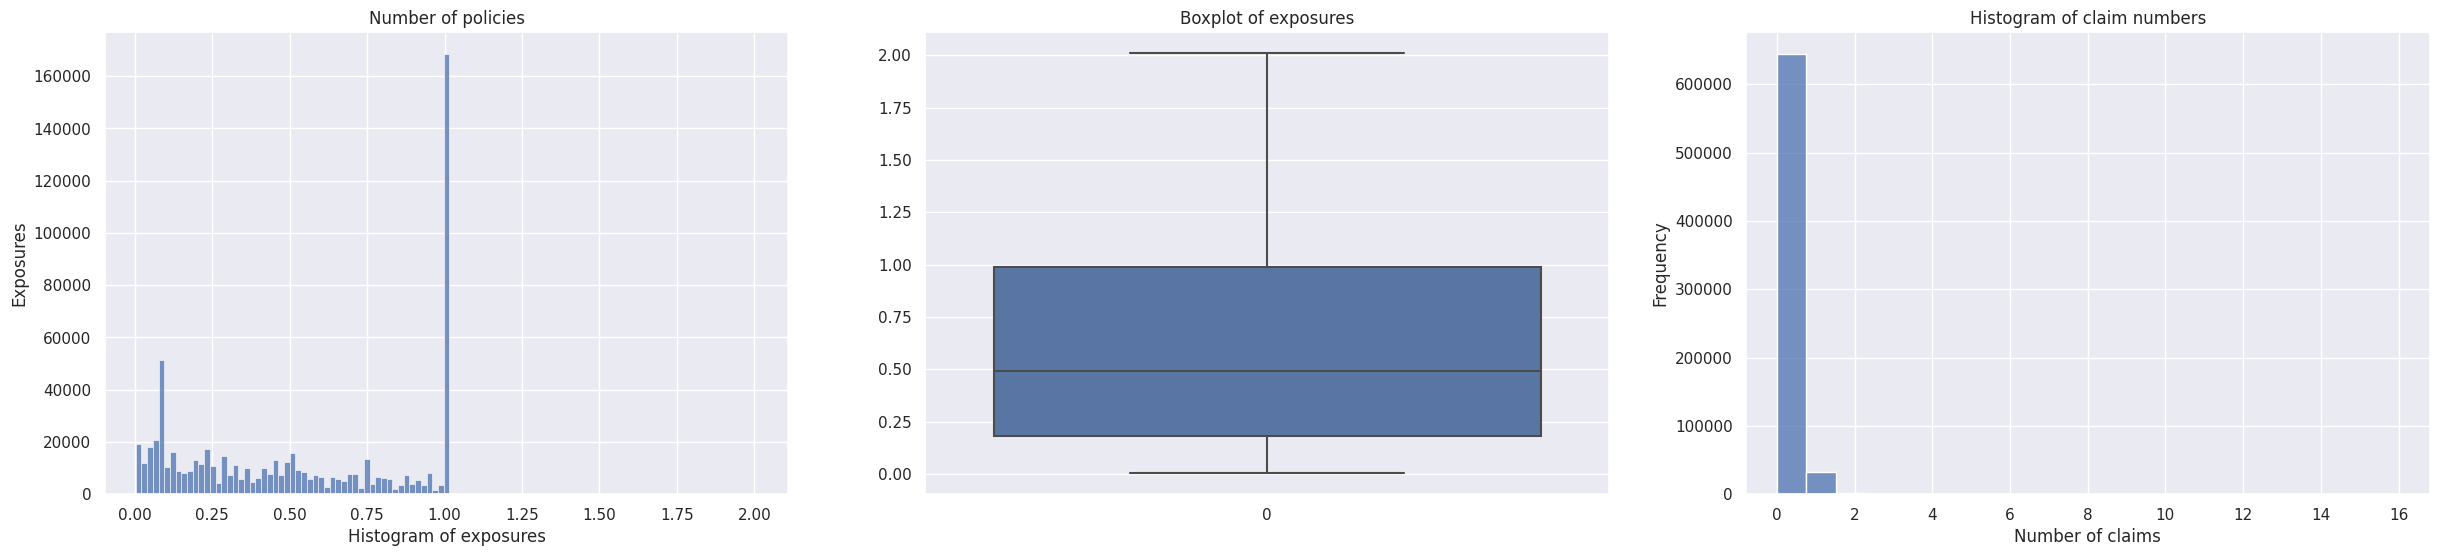

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(30, 6)

sns.histplot(x=freMTPL2freq['Exposure'], ax=ax1)
ax1.set_xlabel('Histogram of exposures')
ax1.set_ylabel('Exposures')
ax1.set_title('Number of policies')

sns.boxplot(freMTPL2freq['Exposure'], ax=ax2)
ax2.set_title('Boxplot of exposures')

sns.histplot(freMTPL2freq['ClaimNb'], ax=ax3)
ax3.set_xlabel('Number of claims')
ax3.set_ylabel('Frequency')
ax3.set_title('Histogram of claim numbers')
plt.savefig('./myHistogramFrenchMotorClaimNb.pdf')